# Đồ án Thực Hành Lập Trình Khoa Học Dữ Liệu

In [1]:
import sys
sys.executable


'/home/echkidieu/miniconda3/envs/min_ds-env/bin/python'

<h1 style="color:orange">Import thư viện</h1>

In [2]:
!pip install wordcloud

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import re
from collections import Counter
from scipy.stats import f_oneway
from wordcloud import WordCloud

---

<h1 style="color:orange">Thu thập dữ liệu</h1>

- Nhóm sử dụng dữ liệu "steam_games.csv" được thu thập sẵn ở trên kaggle. Dữ liệu này là về các game hiện có ở trên steam. Nguồn của dữ liệu được lấy tại: https://www.kaggle.com/datasets/tristan581/all-55000-games-on-steam-november-2022
- LICENSE của dữ liệu là [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/), người dùng được phép sử dụng với mục đích phi thương mại và phải credit cho chủ sở hữu
- Người ta đã thu thập dữ liệu này bằng cách sử dụng API của steam store và API của web thứ ba (steamspy.com)

---

<h1 style="color:orange">Khám phá dữ liệu</h1>

## Đọc dữ liệu vào dataframe

In [4]:
steam_df = pd.read_csv('steam_games.csv', sep = ';')
steam_df.head()

/home/echkidieu/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",...,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",...,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",...,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",...,1999,1999,0,76,English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",...,199,199,0,0,Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


## Dữ liệu có bao nhiêu dòng, bao nhiêu cột?

<h4>Tính số dòng và số cột lưu vào hai biến num_rows và num_cols</h4>

In [5]:
num_rows, num_cols = steam_df.shape
num_rows, num_cols

(55691, 22)

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

<h4>Mỗi dòng cho biết thông tin của từng sản phẩm hiện có trong steam, không có dòng nào có ý nghĩa khác với các dòng còn lại.</h4>

## Tiến hành kiểm tra các dòng có bị lặp không

<h4>Kiểm tra bằng cách lưu kết quả vào biến <b>have_duplicated_rows</b>. Biến này có giá trị True nếu dữ liệu có các dòng bị lặp và False nếu ngược lại.</h4>

In [6]:
duplicated_list = steam_df.duplicated()
if True in duplicated_list:
    have_duplicated_rows = True
else:
    have_duplicated_rows = False
have_duplicated_rows

True

<h4>Không có dòng nào bị lặp cả</h4>

## Mỗi cột có ý nghĩa gì?

|STT|Tên cột dữ liệu | <center>Mô tả<center> | Đơn vị |
|--|:------:| ---| --- |
|1|App ID|<center>ID của sản phẩm<center>|
|2|Name| <center>Tên sản phẩm<center>|
|3|Short Description|<center>Phần giới thiệu sản phẩm<center>|
|4|Developer| <center>Nhà phát triển sản phẩm<center>|  |
|5|Publisher|<center>Nhà phân phối sản phẩm<center>|  | 
|6|Genres|<center>Các thể loại của sản phẩm<center>|
|7|Tags|<center>Các tag được gán cho sản phẩm (từ người dùng)<center>|  |
|8|Type|<center>Cho biết sản phẩm thuộc loại game hay là phần cứng (các phần mềm không phải game cũng được gán giá trị là game)<center>| |
|9|Categories|<center>Các hạng mục/đặc trưng của sản phẩm<center>||
|10|Owners|<center>Số lượng người sở hữu sản phẩm<center>| |  
|11|Positive Reviews|<center>Số lượt đánh giá tích cực<center>| |
|12|Negative Reviews|<center>Số lượt đánh giá tiêu cực<center>| |
|13|Price|<center>Giá bán hiện tại của game<center>|USD|
|14|Initial Price|<center>Giá bán của game thời điểm mới phát hành<center>| USD|
|15|Discount|<center>Phần trăm giảm giá của game<center>| \%|
|16|CCU|<center>Số lượng người chơi đồng thời cao nhất (tính vào ngày 8/11/2021)<center>|  |
|17|Languages|<center>Các ngôn ngữ mà sản phẩm có hỗ trợ<center>|  |
|18|Platforms|<center>Các nền tảng mà sản phẩm hỗ trợ<center>||
|19|Release Date|<center>Ngày phát hành sản phẩm<center>|yyyy/mm/dd
|20|Required Age|<center>Độ tuổi giới hạn<center>|
|21|Website|<center>Trang web của nhà phát triển/nhà phân phối<center>|
|22|Header Image|<center>Đường link lưu ảnh của sản phẩm<center>|


<h2>Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?</h2>

In [7]:
steam_df.columns

Index(['App ID', 'Name', 'Short Description', 'Developer', 'Publisher',
       'Genre', 'Tags', 'Type', 'Categories', 'Owners', 'Positive Reviews',
       'Negative Reviews', 'Price', 'Initial Price', 'Discount', 'CCU',
       'Languages', 'Platforms', 'Release Date', 'Required Age', 'Website',
       'Header Image'],
      dtype='object')

In [8]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55691 entries, 0 to 55690
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   App ID             55691 non-null  int64 
 1   Name               55691 non-null  object
 2   Short Description  55654 non-null  object
 3   Developer          55562 non-null  object
 4   Publisher          55540 non-null  object
 5   Genre              55530 non-null  object
 6   Tags               55556 non-null  object
 7   Type               55691 non-null  object
 8   Categories         54721 non-null  object
 9   Owners             55691 non-null  object
 10  Positive Reviews   55691 non-null  int64 
 11  Negative Reviews   55691 non-null  int64 
 12  Price              55691 non-null  int64 
 13  Initial Price      55691 non-null  int64 
 14  Discount           55691 non-null  int64 
 15  CCU                55691 non-null  int64 
 16  Languages          55680 non-null  objec

<h2>Ta thấy một số vấn đề cần giải quyết:</h2>

- Lúc đọc dữ liệu từ "steam_games.csv", ta có thể thấy warning là:"Columns (19) have mixed types.", nghĩa là cột 19(Required Age) có dtype không đồng nhất.<br>
- Owner: thể hiện giá trị khoảng.<br>
- Release Date cần đưa về dạng datetime<br>

<h4>Kiểm tra và xử lý cột <em>Required Age</em> về dạng đồng nhất</h4>

In [9]:
steam_df['Required Age'].unique()

array(['0', '15', '12', '18', '16', '17', '10', '7', '5', '180', '13',
       '3', '6', '14', 'MA 15+', '7+', '21+', 0, 18, 12, 17, 16, 13, 15,
       8, 14, 10, 3, 7, 6, 20, 9, 180, 35], dtype=object)

In [10]:
def open_object_dtype(s):
    dtypes = set(s.apply(type))
    return dtypes
open_object_dtype(steam_df['Required Age'])

{int, str}

- Steam(*https://store.steampowered.com/*) là một nền tảng phân phối trực tuyến, quản lý bản quyền kỹ thuật số, trò chơi điện tử nhiều người chơi, và dịch vụ giao tiếp xã hội trên nền internet phát triển bởi Valve Corporation. Nên các trò chơi điện tử của các quốc gia khác nhau có giới hạn độ tuổi(**Required Age**) khác nhau, sau đây để dễ so sánh và tổng hợp, nhóm mình(em) xin được quy những giới hạn độ tuổi về thang PEGI(*https://pegi.info/what-do-the-labels-mean*).<br>
- Ở cột **Requied Age** ta xử lý chuyển đổi thông tin thành dạng sau đây:<br>
	- 3(PEGI 3) – suitable for all ages, 
	- 7(PEGI 7) – suitable for young children (age>=7)
	- 12(PEGI 12) – suitable for children 12 and over (age>=12)
	- 16(PEGI 16) – suitable for children 16 and over (age>=16)
	- 18(PEGI 18) – Only suitable for adults (age>=18)

In [11]:
def trans_age(type_age):
    l_age=re.findall(r'\d{1,2}',str(type_age))
    age=int(l_age[0])
    if age>=18:
        return 18
    elif age>=16:
        return 16
    elif age>=12:
        return 12
    elif age>=7:
        return 7
    return 3
steam_df['Required Age']=steam_df['Required Age'].apply(trans_age)

<h4>Xử lý cột <em>Owners</em> về các khoảng:</h4>

In [12]:
steam_df.Owners.unique()

array(['10,000,000 .. 20,000,000', '0 .. 20,000', '200,000 .. 500,000',
       '100,000 .. 200,000', '20,000 .. 50,000', '50,000 .. 100,000',
       '500,000 .. 1,000,000', '2,000,000 .. 5,000,000',
       '5,000,000 .. 10,000,000', '1,000,000 .. 2,000,000',
       '20,000,000 .. 50,000,000', '50,000,000 .. 100,000,000',
       '200,000,000 .. 500,000,000'], dtype=object)

In [13]:
def split_owner(st):
    if not(st is np.nan):
        st=st.replace(',','')
        value=st.split('..')
        return tuple([int(value[0]),int(value[1])])
    return np.nan
steam_df.Owners=steam_df.Owners.apply(split_owner)

<h4>Xử lý cột <em>Release Date</em> về đúng dạng chuẩn yyyy/mm/dd</h4>

In [14]:
steam_df['Release Date']=steam_df['Release Date'].astype('datetime64[s]')

In [15]:
steam_df.head()

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","(10000000, 20000000)",...,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000-11-01,3,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","(0, 20000)",...,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021-05-14,3,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","(200000, 500000)",...,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020-10-16,3,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","(100000, 200000)",...,1999,1999,0,76,English,"windows, mac",2020-10-14,3,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"(0, 20000)",...,199,199,0,0,Simplified Chinese,windows,2019-03-30,3,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


## Phân bố dữ liệu ở các cột:

<h3>Với các cột có kiểu dữ liệu dạng số:</h3>

Với các cột có kiểu dữ liệu số, ta tính:

- Tỉ lệ % các giá trị thiếu
- Giá trị min
- Giá trị max

In [16]:
numeric_cols=steam_df[steam_df.select_dtypes(include=[int,'datetime64[ns]']).columns]

def missing_ratio(col):
    return np.round(col.isna().sum()/len(col)*100,4)
def min(col):
    return col.min()
def max(col):
    return col.max()

num_col_profiles_df=numeric_cols.agg([missing_ratio,min,max])
num_col_profiles_df

,App ID,Positive Reviews,Negative Reviews,Price,Initial Price,Discount,CCU,Release Date,Required Age
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1778,0.0
min,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1997-06-30 00:00:00,3.0
max,2190950.0,5943345.0,908515.0,99900.0,99900.0,90.0,874053.0,2022-11-11 00:00:00,18.0


<h3>Với các cột có kiểu dữ liệu không phải là dạng số:</h3>

Với các dữ liệu không phải số:

- Ta thấy các cột chưa đúng dạng chuẩn *(Bị thừa các ký tự không cần thiết, nội dung giống nhau nhưng sắp xếp khác nhau)*.
- Với các cột **Name, Short Description,Website, Header Image** là những cột chứa thông tin đặc trưng của từng game, nên giá trị phân bố là trải rộng đều với nhau.
- Ngoài ra các cột như Developer, Publisher với số lượng các giá trị lớn, nên khi tính % phân bố sẽ gần như là 0, nên ở phần ratio_value chỉ xuất số lượng của giá trị đó
- Với cột **Tags** chứa thông tin của từng Genre của game *(người dùng tag)* nên ở đây ta cũng không xét phân bố như thế nào

In [17]:
object_cols=steam_df.loc[:,['Developer', 'Publisher', 'Genre', 'Type','Categories', 'Owners', 'Languages', 'Platforms']]
def split_str(st):
    if not (st is np.nan):
        return st.split(',')
    return []
num_value={}
ratio_values={}

<h3>Developer</h3>

Ở 2 cột Developer và Publisher với số lượng lớn, cùng một nội dung nhưng thứ tự khác nhau:
- Ví dụ: *Atomic Fabrik, Cristian Manolachi* và *Cristian Manolachi, Atomic Fabrik * và *Cristian Manolachi, AtomicFabrik * 
- Các kí tự "\," và "\." xuất hiện không có quy lụât lắm. Dẫn đến một số khó khắn chưa thể xử lý dữ liệu tối ưu nhất cho việc phân tích
- Các kí tự hoa, thường còn chưa theo một chuẩn nào

In [18]:
steam_df.Developer.unique()[:100]

array(['Valve', 'IndigoBlue Game Studio', 'NEXT Studios',
       'Vertigo Gaming Inc.', 'DoubleC Games', 'IndieLeague Studio',
       '七月九日', '重庆环游者网络科技', 'Simon Codrington', 'Villain Role',
       '海南众铖互娱网络科技有限公司', 'Kubold', 'LFiO Studio', 'Fireroot Studios',
       'KillPixel', 'DarkDes Labs', 'Meadow Games', 'Amonga99',
       '1337 Game Design', 'Hellride Games', 'CSM', 'White Puppet Studio',
       'Team Clam', 'Victor Martinelli', 'Dahku', 'WASD Games',
       'Nikita "Ghost_RUS"', 'Missing Sentinel Software',
       'Toka, AllianceInFaith', 'ShilohGames', 'Colugo Productions Inc.',
       'ProblemGamer Productions', 'Sonic-Alpha', 'Koopa Yao', 'Gun Beat',
       '泥亾', 'Ancient Forge', 'Dotoyou Games', 'VRANI inc.',
       'Resolution Games', 'Tap by Tap', 'Wayway Studio', 'Cavern Head',
       'Thetis Games', 'Tadpole Interactive', 'Daemon Cat', 'Ladia Group',
       'WINXP Studio', 'Choice of Games', 'MAP Design Lab',
       'Reframe Games Inc.', 'Digital Melody', 'Brian Wilson

In [19]:
def lower_str(st):
    if not (st is np.nan):
        return st.lower()
    return ""

def convert_co_inc(st):
    if not (st is np.nan):
        st = re.sub(" +ltd.?[ .]*","ltd.,", st)
        st= re.sub(" +inc.?[ .]*","inc.,", st)
        st= re.sub(" +llc.?[ .]*","llc.,", st)
        return re.sub(r" *, *(?!inc|ltd|llc)",";", st)
    return ""
def split_dev(st):
    if not (st is np.nan):
        return st.split(';')
    return []

# Xử lý dữ liẹu
col=steam_df.Developer.apply(lower_str).apply(convert_co_inc).apply(split_dev).explode().str.strip()

# Trả dữ liệu đã xử lý về cho cột Developer
steam_df.Developer=col.groupby(col.index).apply(lambda st: ';'.join(st)).replace('',np.nan)

# Tính phân bố dữ liệu
ratio_value=col.replace("",np.nan).value_counts()
num_value.update({"Developer":len(ratio_value)})
ratio_values.update({"Developer":str(ratio_value.to_dict())})

<h3>Publisher</h3>

Cột **Publisher** được sử lý tương tự như cột **Developer**

In [20]:
# Xử lý dữ liẹu
col=steam_df.Publisher.apply(lower_str).apply(convert_co_inc).apply(split_dev).explode().str.strip()

# Trả dữ liệu đã xử lý về cho cột Developer
steam_df.Publisher=col.groupby(col.index).apply(lambda st: ';'.join(st)).replace('',np.nan)

# Tính phân bố dữ liệu
ratio_value=col.replace("",np.nan).value_counts()
num_value.update({"Publisher":len(ratio_value)})
ratio_values.update({"Publisher":str(ratio_value.to_dict())})


<h3>Genre</h3>

In [21]:
steam_df.Genre.apply(split_str).explode().unique()

array(['Action', ' Adventure', ' Indie', 'Adventure', ' RPG', ' Strategy',
       ' Simulation', ' Casual', ' Free to Play',
       ' Massively Multiplayer', 'Casual', 'Indie', ' Early Access',
       'Education', ' Racing', ' Sports', 'RPG', 'Simulation', 'Racing',
       'Strategy', 'Free to Play', 'Animation & Modeling', 'Utilities',
       ' Utilities', 'Audio Production', ' Video Production',
       'Early Access', 'Game Development', ' Design & Illustration',
       'Sports', ' Game Development', 'Design & Illustration',
       ' Software Training', ' Web Publishing', ' Photo Editing',
       ' Education', nan, 'Massively Multiplayer', ' Audio Production',
       'Software Training', ' Animation & Modeling', 'Video Production',
       'Accounting', ' Accounting', 'Photo Editing', ' Action', 'Violent',
       ' Gore', 'Web Publishing', 'Gore', 'Nudity', ' Violent',
       'Sexual Content', ' Nudity', ' Movie'], dtype=object)

Ở cột **Genre** ta chỉ cần xử lý các khoảng trắng bị thừa ở phìa trước và sau.

In [22]:
# Xử lý dữ liệu
col=steam_df.Genre.apply(split_str).explode().str.strip().replace(np.nan,'')

# Trả dữ liệu đã xử lý về lại cột Genre
steam_df.Genre=col.groupby(col.index).apply(lambda st:','.join(st)).replace('',np.nan)

# Tính phân bố dữ liệu
col=col.replace('',np.nan)
ratio_value=np.round(col.value_counts(normalize=True).multiply(100),4)
num_value.update({"Genre":len(ratio_value)})
ratio_values.update({"Genre":str(ratio_value.to_dict())})

<h3>Type</h3>

In [23]:
steam_df.Type.unique()

array(['game', 'hardware'], dtype=object)

Ở cột **Type** các dữ liệu đã ở đúng dạng chuẩn để phân tích, nên ta chỉ thực hiện bước tính phân bố dữ liệu

In [24]:
ratio_value=np.round(steam_df.Type.value_counts(normalize=True).multiply(100))
num_value.update({"Type":len(ratio_value)})
ratio_values.update({"Type":str(ratio_value.to_dict())})

<h3>Owners</h3>

In [25]:
steam_df.Owners.unique()

array([(10000000, 20000000), (0, 20000), (200000, 500000),
       (100000, 200000), (20000, 50000), (50000, 100000),
       (500000, 1000000), (2000000, 5000000), (5000000, 10000000),
       (1000000, 2000000), (20000000, 50000000), (50000000, 100000000),
       (200000000, 500000000)], dtype=object)

Ở cột Owners ta đã xử lý ở phần trên nên cũng chỉ cần thực hiện phần tính phân bố dữ liệu

In [26]:
ratio_value=np.round(steam_df.Owners.value_counts(normalize=True).multiply(100))
num_value.update({"Owners":len(ratio_value)})
ratio_values.update({"Owners":str(ratio_value.to_dict())})

<h3>Categories</h3>

In [27]:
steam_df.Categories.apply(split_str).explode().unique()

array(['Multi-player', ' Valve Anti-Cheat enabled', ' Online PvP',
       ' Shared/Split Screen PvP', ' PvP', 'Single-player',
       ' Partial Controller Support', ' Steam Achievements',
       ' Steam Cloud', ' Steam Trading Cards', ' Single-player', ' Co-op',
       ' Shared/Split Screen', ' Full controller support',
       ' Shared/Split Screen Co-op', ' Remote Play on Phone',
       ' Remote Play on Tablet', ' Remote Play on TV',
       ' Remote Play Together', ' Online Co-op', ' Steam Leaderboards',
       ' In-App Purchases', ' Cross-Platform Multiplayer', nan, ' Stats',
       ' Commentary available', ' Includes level editor',
       ' Steam Workshop', ' MMO', 'Online PvP', 'Steam Cloud',
       ' Captions available', ' LAN PvP', ' LAN Co-op',
       'In-App Purchases', 'Steam Achievements',
       ' Steam Turn Notifications', 'Includes level editor',
       'Steam Workshop', 'Partial Controller Support',
       ' Includes Source SDK', 'Full controller support',
       'Remote 

Ở cột **Categories** ta chỉ cần xử lý các khoảng trắng bị thừa ở phìa trước và sau.

In [28]:
# Xử lý dữ liệu
col=steam_df.Categories.apply(split_str).explode().str.strip().replace(np.nan,'')

# Trả giá trị đã xử lý về lại cột Categories
steam_df.Categories=col.groupby(col.index).apply(lambda st:','.join(st)).replace('',np.nan)

# Tính phân bố dữ liệu
col=col.replace('',np.nan)
ratio_value=np.round(col.value_counts(normalize=True).multiply(100))
num_value.update({"Categories":len(ratio_value)})
ratio_values.update({"Categories":str(ratio_value.to_dict())})

<h3>Languages</h3>

In [29]:
steam_df.Languages.apply(split_str).explode().unique()

array(['English', ' French', ' German', ' Italian', ' Spanish - Spain',
       ' Simplified Chinese', ' Traditional Chinese', ' Korean',
       'Simplified Chinese', ' English', ' Japanese', ' Russian',
       ' Portuguese - Brazil', 'Japanese', ' Arabic', ' Bulgarian',
       ' Czech', ' Danish', ' Dutch', ' Finnish', ' Greek', ' Hungarian',
       ' Norwegian', ' Polish', ' Portuguese - Portugal', ' Romanian',
       ' Spanish - Latin America', ' Swedish', ' Thai', ' Turkish',
       ' Ukrainian', ' Vietnamese', ' Not supported', 'French', 'Russian',
       'Traditional Chinese', 'Korean', ' Portuguese', ' Latvian',
       'Italian', ' Lithuanian', ' Georgian', ' Serbian', ' Croatian',
       'Spanish - Latin America', 'German', 'Spanish - Spain', ' Irish',
       ' Hebrew', ' Indonesian', ' Luxembourgish', 'Polish', ' Slovak',
       ' Belarusian', 'Czech', ' Malay', ' Swahili', ' #lang_slovakian',
       nan, ' Basque', ' Hindi', 'Portuguese - Brazil', ' Welsh',
       'Russian\nEn

Ở cột **Languages** ta thấy được rất nhiều kí tự không đúng chuẩn, dẫn đến lúc phân tích các dữ liệu không đúng:
- Lẫn các kí từ : \r\n , \[b]*[/b], \n
- Các tên ngôn ngữ bị lỗi: #lang_slovakian
- English, Not supported : được hiểu là ngôn ngữ Tiếng Anh không được hỗ trợ
- Các ngôn ngữ: Spanish - Latin America , Portuguese - Brazil, Spanish - Spain, Spanish - Latin America sẽ chỉ lấy những ngôn ngữ chính ở phía trước

Chúng ta sẽ bắt đầu xử lý những vấn đề trên

In [30]:
def clean_lang(lang_str):
    if not (lang_str is np.nan):
        return lang_str.replace('\r\n',',').replace('English, Not supported','English Not supported').replace('\n',',').replace('[b]*[/b]','').replace(';','').replace('#lang_slovakian', 'Slovak')
    return ""

# Xử lý dữ liệu
col=steam_df.Languages.apply(clean_lang).apply(split_str).explode().str.strip().apply(lambda st: st.split('-')[0].strip())

# Trả dữ liệu đã xử lý về  cho cột Languages
steam_df.Languages=col.groupby(col.index).apply(lambda st: ','.join(st)).replace('^ *$',np.nan,regex=True)
# Tính phần bố dữ liệu
col=col.replace('',np.nan)
ratio_value=np.round(col.value_counts(normalize=True).multiply(100),4)
num_value.update({"Languages":len(ratio_value)})
ratio_values.update({"Languages":str(ratio_value.to_dict())})

<h3>Platforms</h3>

In [31]:
steam_df.Platforms.apply(split_str).explode().unique()

array(['windows', ' mac', ' linux', 'mac', 'linux'], dtype=object)

Ở cột **Platforms** ta chỉ cần xử lý các khoảng trắng bị thừa ở phìa trước và sau.

In [32]:
# Xử lý dữ liệu
col = steam_df.Platforms.apply(split_str).explode().str.strip().replace(np.nan,'')

# Trả dữ liệu đã xử lý về cho cột Platforms
steam_df.Platforms=col.groupby(col.index).apply(lambda st:','.join(st)).replace('',np.nan)

# Tính phân bố của dữ liệu
col=col.replace('',np.nan)
ratio_value=np.round(col.value_counts(normalize=True).multiply(100),4)
num_value.update({"Platforms":len(ratio_value)})
ratio_values.update({"Platforms":str(ratio_value.to_dict())})

<h4>Bảng phân bố dữ liệu <b>không</b> phải là dữ liệu số</h4>

In [33]:
obj_col_profiles_df=object_cols.agg([missing_ratio])
obj_col_profiles_df=obj_col_profiles_df.append(pd.DataFrame(num_value, index=[0]))
obj_col_profiles_df.rename(index={0:'num_value'},inplace=True)
obj_col_profiles_df=obj_col_profiles_df.append(pd.DataFrame(ratio_values,index=[0]))
obj_col_profiles_df.rename(index={0:'ratio_value'},inplace=True)

In [34]:
# pd.set_option('display.max_colwidth',200)
obj_col_profiles_df


,Developer,Publisher,Genre,Type,Categories,Owners,Languages,Platforms
missing_ratio,0.2316,0.2711,0.2891,0.0,1.7418,0.0,0.0198,0.0
num_value,36507.0,29746.0,28.0,2.0,36.0,13.0,73.0,3.0
ratio_value,"{'choice of games': 140, 'creobit': 129, 'laus...","{'big fish games': 424, '8floor': 244, 'sega':...","{'Indie': 25.2568, 'Action': 15.1225, 'Casual'...","{'game': 100.0, 'hardware': 0.0}","{'Single-player': 27.0, 'Steam Achievements': ...","{(0, 20000): 68.0, (20000, 50000): 13.0, (5000...","{'English': 26.7856, 'Spanish': 7.4463, 'Germa...","{'windows': 72.3968, 'mac': 16.6051, 'linux': ..."


## Đưa ra các câu hỏi

### Câu 1: Các thể loại có lượt người tag nhiều nhất. Tương quan giữa lượt tag thể loại của game đó với thể loại chính thức của game?

**Ý nghĩa khi trả lời câu hỏi:** 
* Có được cái nhìn tổng quan về từng thể loại, thể loại được người chơi công nhận nhiều nhất (thể loại mỗi game do chính người chơi tự nhìn nhận và định nghĩa)
* Biết được liệu rằng thể loại chính thức của game có giống với những gì mà người dùng trải nghiệm hay không?

**Các bước cần làm để để trả lời câu hỏi:**

* Đầu tiên ta cần đưa thông tin về lượt tag trong từng game về dưới dạng dictionary với key là thể loại và value là số lượng người dùng tag game với thể loại đó
* Tiếp đến để xét tổng quan lượt tag của từng thể loại, ta cần cộng các giá trị lượt tag của từng thể loại xuyên suốt tất cả các game với nhau và lưu vào một Series với index là tên thể loại và value là tổng số lượt tag của thể loại đó
* Với ý thứ hai, ta sẽ xét các thể loại (genres) chính thức của game bằng cách chấm điểm dựa vào số lượt tag của từng thể loại, cụ thể như sau:
    * Đối với các thể loại chính thức có ở trong phần tag, ta tính điểm bằng tỉ lệ giữa lượt tag của thể loại đó với tổng lượt tag
    * Đối với các thể loại chính thức nhưng không có trong phần tag thì ta cho điểm bằng 0
    * Từ điểm của từng thể loại, ta tính trung bình điểm bằng cách lấy tổng điểm của các thể loại chính thức đã tính ở trên chia cho tổng số thể loại.

**Bước 1:** Ta tạo một dataframe mới có 2 cột là `Genre` và `Tags` lấy từ dataframe gốc, với cột `Tags`, ta tiến hành chuyển đổi nó về dạng dictionary với key là thể loại và values là số lượng người dùng tag game với thể loại đó.

In [35]:
def split_genre(x):
    if x is np.nan:
        return np.nan
    return [i.strip() for i in x.split(',')]
def split_tags(x):
    if x is np.nan:
        return []
    return [i.strip() for i in x.split(',')]
genres_tag_df = steam_df[["Genre", "Tags"]].copy()
genres_tag_df["Genre"] = genres_tag_df["Genre"].apply(split_genre)
genres_tag_df["Tags"] = genres_tag_df["Tags"].apply(split_tags)
def convert_to_dict(x: list):
    res = {}
    if len(x) == 0:
        return np.nan
    for string in x:
        key, val = string.split(': ')
        res[key] = int(val)
    return res
genres_tag_df["Tags"] = genres_tag_df["Tags"].apply(convert_to_dict)
genres_tag_df

,Genre,Tags
0,[Action],"{'Action': 5426, 'FPS': 4831, 'Multiplayer': 3..."
1,"[Action, Adventure, Indie]","{'""Shoot Em Up""': 186, 'Metroidvania': 181, 'B..."
2,"[Adventure, Indie, RPG, Strategy]","{'Rogue-like': 268, 'Turn-Based Combat': 254, ..."
3,"[Action, Indie, Simulation, Strategy]","{'Typing': 221, 'Management': 213, 'Casual': 2..."
4,"[Action, Casual, Indie, Simulation]","{'Action': 22, 'Casual': 22, 'Indie': 21, 'Sim..."
...,...,...
55686,[Education],"{'Education': 22, 'VR': 6, 'Space': 5}"
55687,"[Adventure, Casual, Indie]","{'Casual': 21, 'Indie': 21, 'Adventure': 20}"
55688,[Animation & Modeling],"{'Animation & Modeling': 25, '3D': 13}"
55689,"[Indie, RPG, Strategy, Early Access]","{'Early Access': 21, 'Indie': 20, 'RPG': 20, '..."


Để tiện cho việc xử lý các bước sau, ta tiến hành bỏ đi các dòng có giá trị NaN.

In [36]:
print('Before:', genres_tag_df.shape[0])
genres_tag_df = genres_tag_df.dropna()
print('After:', genres_tag_df.shape[0])

Before: 55691
After: 55397


Có thể thấy số lượng các dòng bị bỏ đi là không đáng kể nên nhìn chung việc này sẽ không ảnh hưởng mấy đến kết quả cuối cùng.

**Bước 2:** Sau khi đã chuyển dữ liệu của cột Tags thành dictionary rồi thì ta tiến hành tính tổng số lượt tag của từng thể loại, lưu kết quả vào Series `tolal_num_tags` với mỗi dòng biểu thị số lượng tổng mỗi tag.

In [37]:
c = Counter()
def sum_tags(row):
    c.update(row)
    return row
genres_tag_df["Tags"].apply(sum_tags)
total_num_tags = pd.Series(c, index = c.keys())
total_num_tags = total_num_tags.sort_values(ascending = False)
print(total_num_tags)
print(len(total_num_tags))

Action           2906734
Adventure        2402972
Indie            2255578
Singleplayer     2164801
Casual           2003200
                  ...   
Steam Machine        233
Mahjong              231
Volleyball           179
Coding                51
Tile-Matching         45
Length: 441, dtype: int64
441


Ta có thể thấy được top 5 thể loại đang được người chơi để ý và công nhận nhất là `Action`, `Adventure`, `Indie`, `Singleplayer`, `Casual`

**Bước 3:** Chấm điểm cho các game dựa vào độ tương đồng giữa thể loại chính thức và thể loại do người chơi tag. Đầu tiên ta tiến hành tính điểm như đã mô tả ở trên và lưu dữ liệu vào một Series có tên `score`.

In [38]:
def scoring(row):
    res = 0
    genres = row["Genre"]
    tags = row["Tags"]
    for genre in genres:
        if genre in tags.keys():
            score = tags[genre] / sum(tags.values())
        else:
            score = 0
        res += score
    return res/len(genres)
score = genres_tag_df.apply(scoring, axis = 1)
print(score)
print('Mean:', score.mean())

0        0.165407
1        0.037081
2        0.040564
3        0.039421
4        0.250000
           ...   
55686    0.666667
55687    0.333333
55688    0.657895
55689    0.250000
55690    0.111111
Length: 55397, dtype: float64
Mean: 0.18809526749099964


Theo như ta thấy, điểm trung bình độ tương đồng có vẻ thấp. Một cách để giải thích cho việc này chính là các thể loại do chính người dùng tự định nghĩa và tag là rất đa dạng, ta có thể nhìn thấy, số lượng thể loại được tag lên đến hơn 400 thể loại khác nhau trong khi số lượng thể loại chính thức do chính nhà phát hành đưa ra chỉ đâu đó tầm 30 thể loại. 
Bây giờ ta cùng thử lọc ra các game có độ tương đồng lớn hơn 0.5 xem sao.

In [39]:
gt05 = pd.Series(score.loc[score>=0.5])
print(gt05)
print(len(gt05)/len(score))

21       0.508197
43       0.524590
44       0.500000
51       1.000000
78       1.000000
           ...   
55674    0.625000
55675    0.500000
55677    0.500000
55686    0.666667
55688    0.657895
Length: 3465, dtype: float64
0.06254851345740745


Bây giờ ta cùng thử xem liệu các game có số lượng trên 0.5 có liên quan gì tới số lượng người sở hữu không

Ta tạo một dataframe có hai cột là `Score` và `Owners` lần lượt là số điểm tương đồng và số lượng người sở hữu của game đó.

In [40]:
owners = steam_df["Owners"]
score_owner_df = gt05.to_frame(name = "Score").join(owners)
score_owner_df

,Score,Owners
21,0.508197,"(0, 20000)"
43,0.524590,"(0, 20000)"
44,0.500000,"(0, 20000)"
51,1.000000,"(0, 20000)"
78,1.000000,"(0, 20000)"
...,...,...
55674,0.625000,"(0, 20000)"
55675,0.500000,"(0, 20000)"
55677,0.500000,"(0, 20000)"
55686,0.666667,"(0, 20000)"


Tiếp đến, ta sẽ đếm số lượng đạt game 0.5 theo từng khoảng lượng người dùng.

In [41]:
count_score_owner = score_owner_df.groupby(["Owners"])["Owners"].count()
count_score_owner

Owners
(0, 20000)             2771
(20000, 50000)          454
(50000, 100000)         139
(100000, 200000)         54
(200000, 500000)         35
(500000, 1000000)         6
(1000000, 2000000)        4
(2000000, 5000000)        1
(5000000, 10000000)       1
Name: Owners, dtype: int64

Thử trực quan hóa kết quả bằng biểu đồ bar

Text(0.5, 1.0, 'Nums of high score games according to owners range')

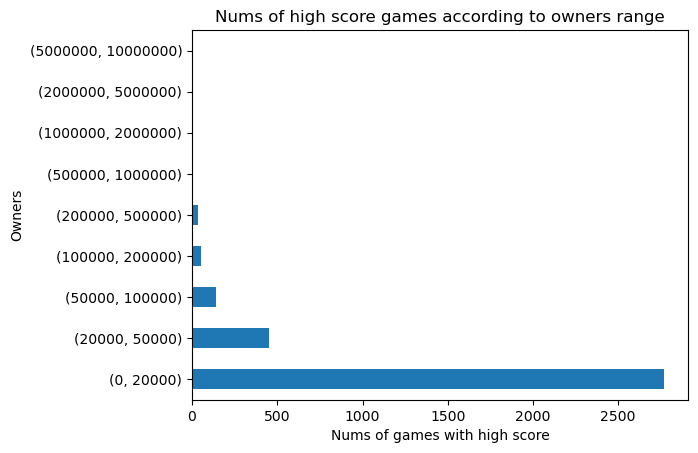

In [42]:
ax = count_score_owner.plot.barh()
ax.set_xlabel("Nums of games with high score")
ax.set_title("Nums of high score games according to owners range")

Qua đây có thể thấy được là game càng có nhiều người chơi thì điểm tương đồng càng ít, điều này là vì càng nhiều người chơi thì sẽ có càng nhiều tag và độ đa dạng của tag sẽ càng nhiều, từ đó khiến tới việc điểm tương đồng bị giảm

### Câu 2: Phân tích các game được nhiều người sở hữu dựa trên dòng game, phân lớp của game và yếu tố giới thiệu game.

Nếu bản thân là một người muốn gia nhập ngành game và muốn khảo sát thị hiếu của người tiêu dùng của game hoặc muốn quảng bá cho game thì nên phát triển dòng game nào để khởi đầu an toàn, hoặc nên dùng những keyword nào để quảng bá cho game

Bước 1: Chọn ra những đặc trưng cần thiết cần thiết.  
Ở đây, em chọn ra genre, categories và short description của game

In [43]:
col = ['Genre', 'Categories', 'Short Description']
option = [(200000000,500000000),(50000000,100000000),(20000000,50000000),(10000000,20000000),(5000000,10000000),(2000000,5000000)]
df = steam_df[col][steam_df.Owners.isin(option)].copy()
df

,Genre,Categories,Short Description
0,Action,"Multi-player,Valve Anti-Cheat enabled,Online P...",Play the world's number 1 online action game. ...
314,Action,"Multi-player,Single-player,Co-op","Call of Duty is back, redefining war like you'..."
661,Action,"Multi-player,Single-player,Valve Anti-Cheat en...",The most-anticipated game of the year and the ...
907,"Action,RPG","Single-player,Partial Controller Support,Steam...",The minds of New York Times bestselling author...
1648,"Casual,Free to Play,Strategy","Multi-player,Single-player,Partial Controller ...",Hire a crew and destroy your rivals in this ne...
...,...,...,...
54341,Strategy,"Multi-player,Single-player,Co-op,Steam Achieve...",The Bloons are back and better than ever! Get ...
54578,"Action,Adventure,Casual,Indie,Strategy","Multi-player,Single-player,Co-op,Steam Achieve...",There is reportedly an evil inside that house....
54903,Action,"Multi-player,Single-player,Co-op,Steam Achieve...",The Master Chief’s iconic journey includes six...
55380,"Free to Play,Massively Multiplayer,RPG","Multi-player,Co-op,MMO,Full controller support...","In Star Trek Online, the Star Trek universe ap..."


Bước 2: Tiền xử lý song song với phân tích. Việc đơn giản là thống kê ra 5 dòng game và thể loại game được ưa chuộng nhất hiện nay.

In [44]:
def split(x):
    if x is np.nan:
        return np.nan
    return [i.strip() for i in x.split(',')]

def convert_to_dict(x: list):
    res = {}
    if len(x) == 0:
        return np.nan
    for string in x:
        key, val = string.split(': ')
        res[key] = int(val)
    return res

genres = df.Genre.apply(split_genre).explode(ignore_index=True)
genres_count = genres.value_counts()
genres_count[:5]

Action          349
Adventure       172
Indie           168
RPG             112
Free to Play    112
Name: Genre, dtype: int64

In [45]:
categories = df.Categories.apply(split).explode(ignore_index=True)
categories_count = categories.value_counts()
categories_count

Single-player                 397
Steam Achievements            355
Multi-player                  338
Steam Trading Cards           301
Steam Cloud                   248
Co-op                         213
Full controller support       204
Remote Play on Tablet         179
PvP                           175
Online PvP                    173
Online Co-op                  154
Remote Play on TV             137
Remote Play on Phone          120
Partial Controller Support    119
Steam Workshop                104
In-App Purchases              103
Remote Play Together           73
Includes level editor          71
Steam Leaderboards             66
Cross-Platform Multiplayer     63
MMO                            56
Stats                          53
Valve Anti-Cheat enabled       48
Shared/Split Screen            47
Captions available             39
Shared/Split Screen Co-op      31
Shared/Split Screen PvP        31
LAN Co-op                      29
LAN PvP                        23
Includes Sourc

Dễ thấy, các tựa game hành động, RPG hay chơi miễn phí chiếm số lượng lớn trong việc quyết định mua game của khách hàng.  
Trong khi đó, phân loại game được ưa chuộng là đơn người chơi, đa người chơi và các hợp tác với nền tảng phát hành là Steam, nên từ đây nếu muốn phát hành game trên Steam thì nhà phát hành có thể cân nhắc đến việc hợp tác với Steam, đưa ra những sự kiện hấp dẫn người mua.

Bước 3: Phân tích những keyword nào trong lời mô tả của các game chiếm nhiều nhất.

Ở đây em sử dụng thống kê số học (TF-IDF) để thống kê các từ vựng có trong câu và tần suất các từ đó.

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X = vectorizer.fit_transform(df['Short Description'])
k = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

Tiếp theo em dùng KMeans để tiến hành chia cụm cho những keyword vừa tìm được và tìm số cụm phù hợp bằng đánh giá Tổng bình phương kết hợp với phương pháp Elbow


In [47]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
# Kmeans clustering
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=600, n_init=10)
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

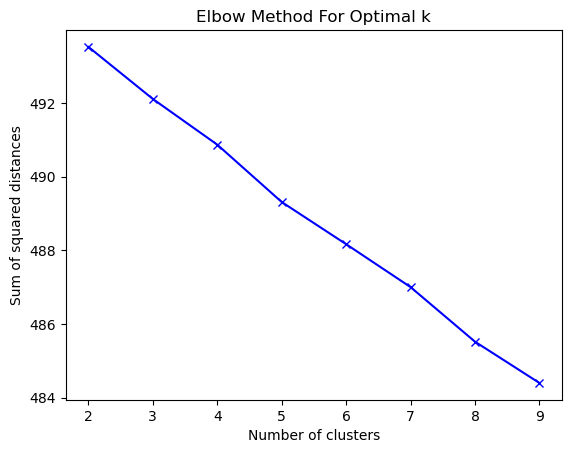

In [48]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Ở đây, số cụm hầu như là tuyến tính nên bản thân em chọn 3 cụm để đưa ra nhiều góc nhìn về các keywords.

In [49]:
# Get clusters
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# Get prediction/ labels
labels = model.labels_
game_cluster = pd.DataFrame(list(zip(df['Short Description'],labels)),columns=['title','cluster'])

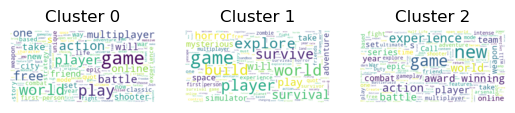

In [50]:
for k in range(true_k):
    text = game_cluster[game_cluster.cluster == k]['title'].str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)

   # Create subplot
    plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
    plt.plot()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
plt.show()

Các từ khóa trong wordcloud sẽ được quan tâm và đưa vào phần giới thiệu của game. Việc phân tích này còn giúp ích cho việc game dễ tìm kiếm hơn so với việc không thêm những keyword phổ biến.

<h3>Câu 4: Tương quan số lượng người sở hữu game và giá tiền của game. Từ đó đưa ra nhận xét giá tiền của một game có ảnh hưởng đến số lượng người sở hữu game đó hay không?</h3>

- Ý nghĩa khi trả lời câu hỏi:
    - Trong quá trình phân tích quan sát các biểu đồ được vẽ ra, giúp thấy được khái quát qua được dữ liệu thể hiện những gì, phân bố như thế nào
    - Trả lời được câu hỏi liệu rằng, chưa quan tâm đến nội dung, nhưng gần như các game được nhiều người sở hữu thì rẻ.
- Các bước thực hiện:
    - Bước 1: Xem xét sử dụng cột giá tiền nào Price hay Initial Price
    - Bước 2: Thống kê xem số lượng game theo các khoảng người sở hữu game: giúp biết được khoảng người sở hữu game nào đang có nhiều game nhất và chiếm bao nhiêu %
    - Bước 3: Lấy khoảng người sở hữu game có nhiều game nhất để phân tich thử: trung bình, trung vị, mode, giá sẽ tập trung như thể nào,...
    - Bước 4: Vẽ biểu đồ tương quan với các khoảng khác: thấy được sự thay đổi của các thông số thống kê.
    - Bước 5: Tìm tương quan giữa giá tiền và số lượng người sở hữu

<h4>Bước 1: Xét độ tương quan giữa cột <b>Price</b> và cột <b>Initial Price</b>:</h4>

In [51]:
steam_df.Price.corr(steam_df['Initial Price'])

0.9882769950607282

<h4>Nhận xét:</h4>

- Ta thấy độ tương quan giữa 2 cột là 98.82%, nên xem như có thể dùng 1 trong 2 cột để so sánh gần như ra kết quả tương đương nhau
- Ở đây nhóm sử dụng giá hiện tại **(Price)** để thực hiện giải đáp câu hỏi

<h4>Bước 2: Thống kê số lượng game và số lượng người sở hữu</h4>

In [52]:
owners_game=steam_df.Owners.value_counts()
owners_game

(0, 20000)                38072
(20000, 50000)             7285
(50000, 100000)            3695
(100000, 200000)           2519
(200000, 500000)           2162
(500000, 1000000)           933
(1000000, 2000000)          526
(2000000, 5000000)          335
(5000000, 10000000)          97
(10000000, 20000000)         41
(20000000, 50000000)         21
(50000000, 100000000)         4
(200000000, 500000000)        1
Name: Owners, dtype: int64

<h5>Vẽ biểu đồ để thấy sự chênh lệch số lượng như thế nào</h5>

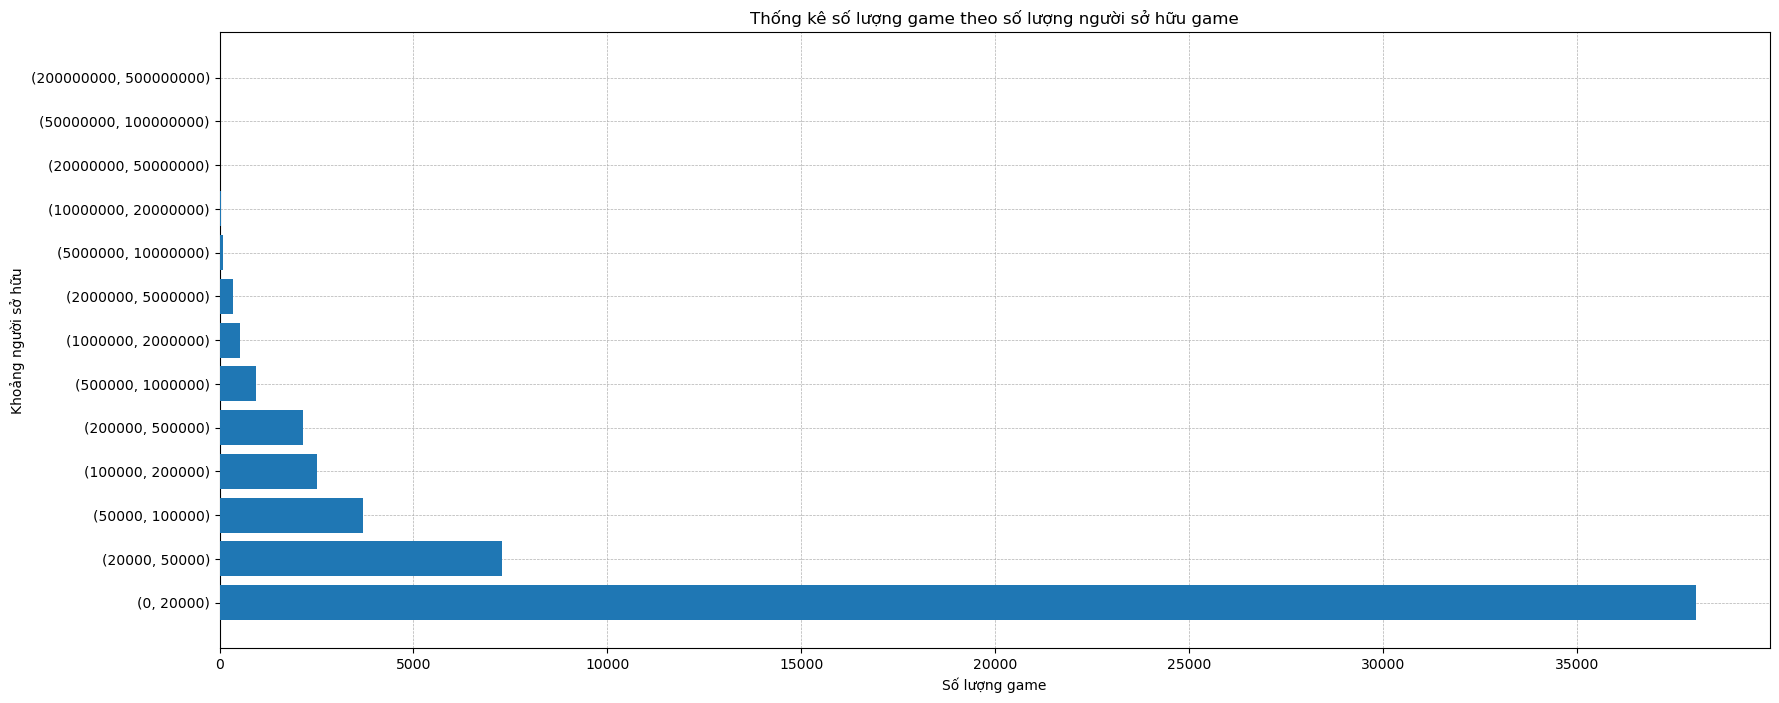

In [53]:

fig =plt.subplots(figsize=(20,8))

owner=np.array(owners_game.keys())
for i in range(len(owner)):
    owner[i]=str(owner[i])
num_game=np.array(owners_game.values)
plt.barh(owner,num_game,zorder=3)
plt.xlabel('Số lượng game')
plt.ylabel('Khoảng người sở hữu')
plt.title('Thống kê số lượng game theo số lượng người sở hữu game')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

<h4>Nhận xét:</h4>

- Các game với số lượng người chơi ít *(0,20000)* chiếm xấp xỉ 70% tất các các game trong danh sách game.
- Tỉ lệ nghịch giữa số lượng người chơi game với số lượng game: game càng có nhiều người sở hữu thì số lượng của game đó ít và ngược lại

<h4>Bước 3: Xét game có số lượng người sở hữu (0,20000) </h4>

In [54]:
low_owner=steam_df[steam_df.Owners==(0, 20000)]

<h5>Tính các thông số thống kê

In [55]:
def q1(x):
    return x.quantile(0.25)
def interval_zone(col):
    return tuple(np.round([col.mean()-3*col.std(),col.mean()+3*col.std()],1))
def mode(col):
    return pd.Series.mode(col)[0]
# 90th Percentile
def q3(x):
    return x.quantile(0.75)
info_price=low_owner.Price.agg(['min','max','mean',mode,'median','std', q1,q3,interval_zone])
info_price

min                              0
max                          99900
mean                    709.759351
mode                           499
median                       499.0
std                    1092.846986
q1                           199.0
q3                           999.0
interval_zone    (-2568.8, 3988.3)
Name: Price, dtype: object

<h4>Nhận xét:</h4>

- 99% dữ liệu phân bố trong khoảng (-1432.2,3988.3), mà giá tiền không âm, nên khoảng phân bố 99% dữ liệu được hiểu là trong khoảng (0,3988.3) USD.
- Dữ liệu lệch phải (mean>median, mean>mode và mode=median)
- Ta thấy dữ liệu có độ lệch chuẩn hơn 1000, nên có thể đoán dự đoán được, dữ liệu bị nhiễu (do max=99900, gấp 99 lần độ lệch chuẩn)

<h5>Xử lý và vẽ biểu đồ:</h5>

- Độ nhiễu lớn, nên chỉ thực hiện vẽ trong khoảng phân bố 95% dữ liệu để tiện cho việc quan sát.

<h5>Lấy khoảng giá trị trên cho dữ liệu</h5>

In [56]:
upper_interval=int(info_price.iloc[8][1])
upper_interval

3988

In [57]:
low_owner_plot=low_owner[low_owner.Price<=upper_interval]

<h5>Tính số lượng game theo giá tiền</h5>

In [58]:
price_low_owner=low_owner_plot.Price.value_counts().sort_index()
display(price_low_owner)

0       4011
28        16
29         7
31         6
37        16
        ... 
3499      73
3595       1
3599       1
3749       1
3900       1
Name: Price, Length: 281, dtype: int64

<h5>Vẽ biểu đồ đường </h5>

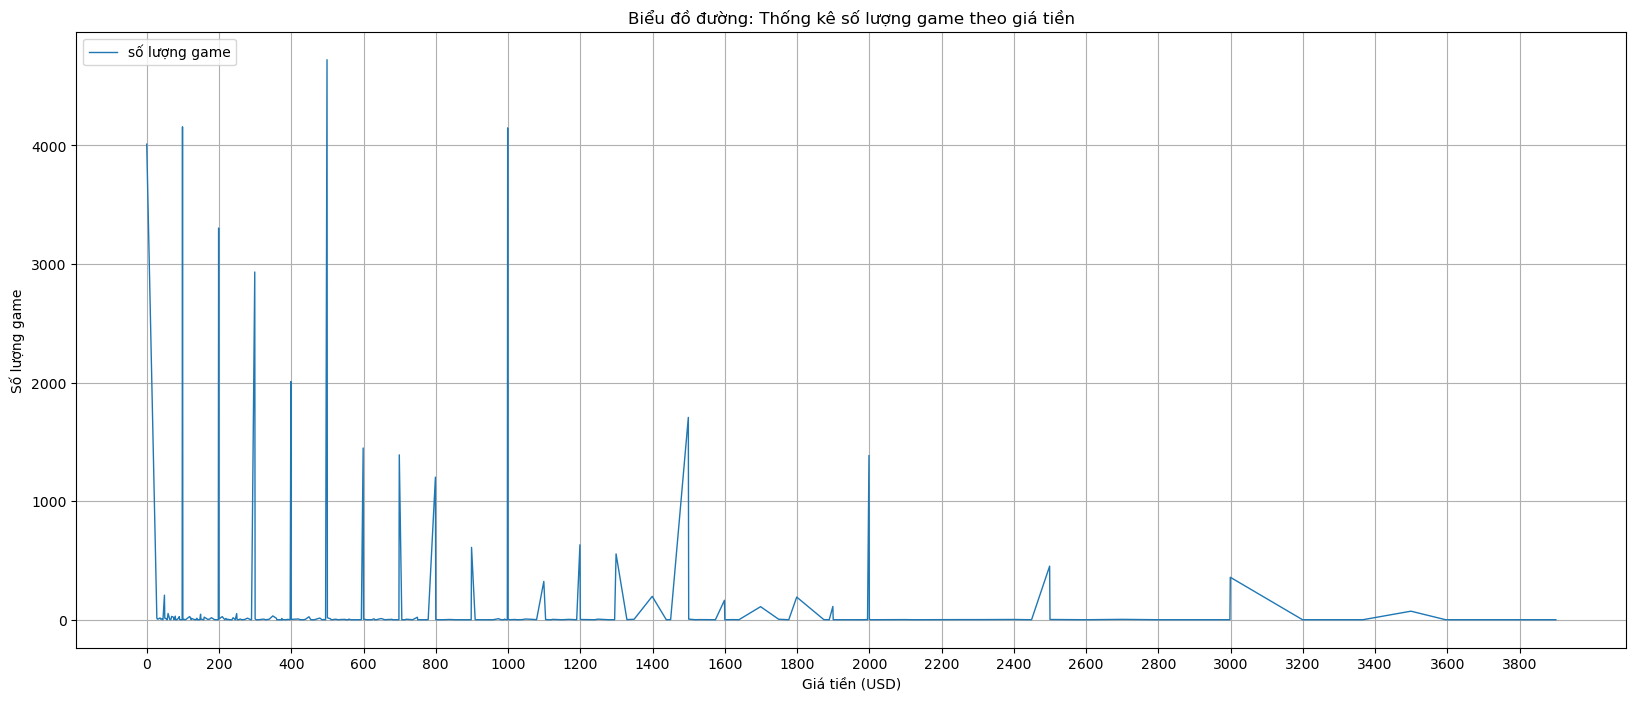

In [59]:
fig =plt.subplots(figsize=(20,8))

price=np.array(price_low_owner.keys())
num_game=np.array(price_low_owner.values)

plt.plot(price,num_game,linestyle='-',linewidth=1,label='số lượng game')
plt.xlabel('Giá tiền (USD)')
plt.ylabel('Số lượng game')
plt.title('Biểu đồ đường: Thống kê số lượng game theo giá tiền')
plt.legend(loc='upper left')
plt.xticks(range(0,price[-1],200))
plt.grid(True)
plt.show()

<h5>Vẽ biểu đồ histogram</h5>

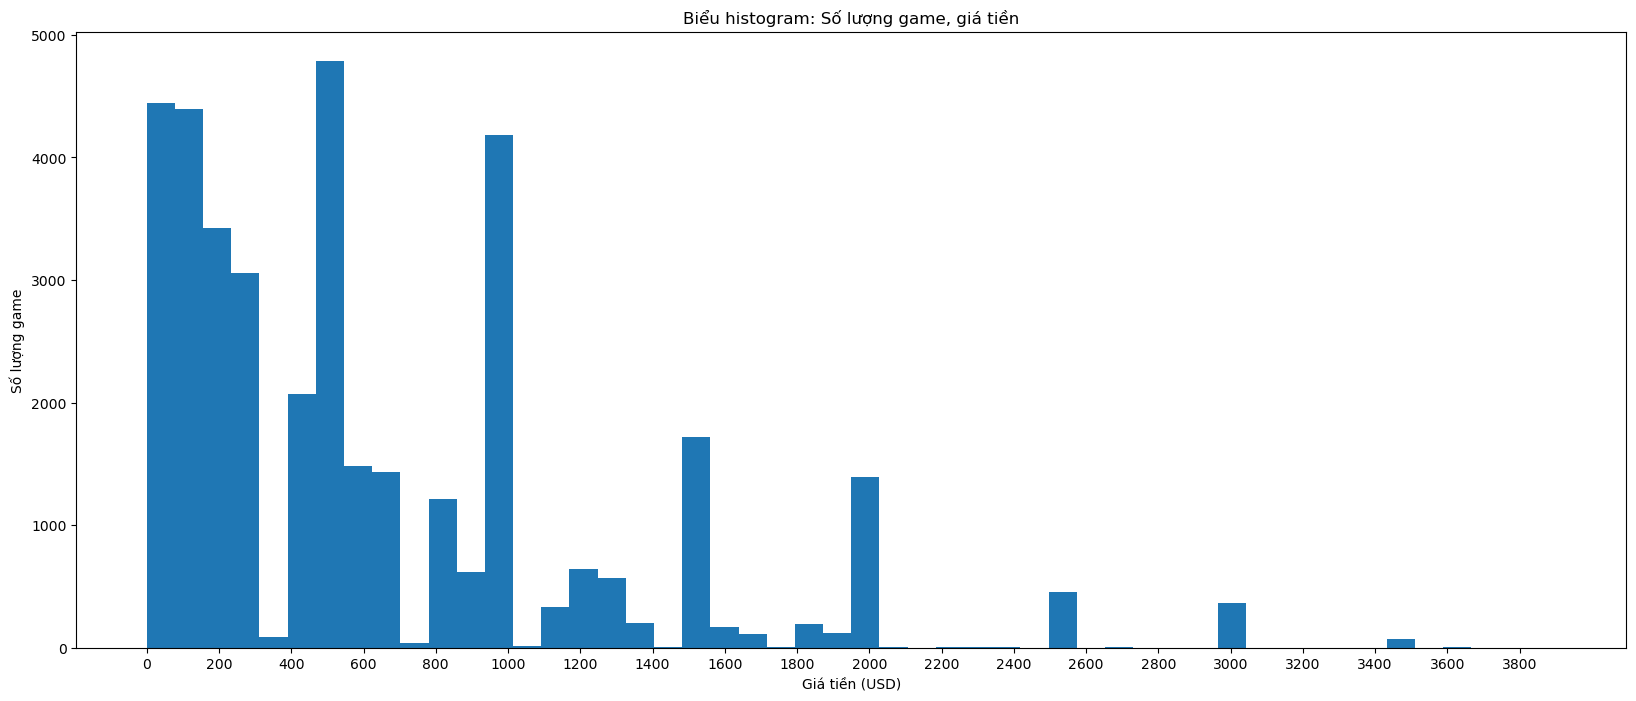

In [60]:
fig =plt.subplots(figsize=(20,8))

plt.hist(low_owner_plot.Price,bins=50)
plt.xlabel('Giá tiền (USD)')
plt.ylabel('Số lượng game')
plt.title('Biểu histogram: Số lượng game, giá tiền')
plt.xticks(range(0,price[-1],200))
plt.show()

<h5>Vẽ biểu đồ hộp nhé</h5>

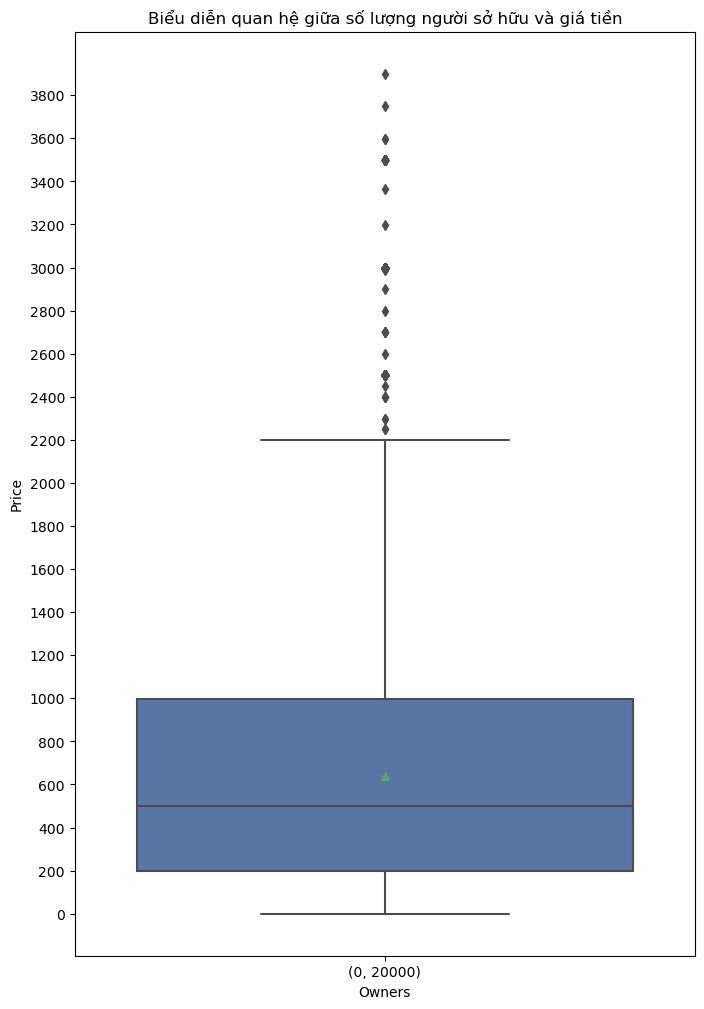

In [61]:
fig =plt.subplots(figsize=(8,12))

y_range=range(0,int(upper_interval),200)
sns.set()
sns.boxplot(x='Owners',y='Price',data=low_owner_plot,showmeans=True,width=0.8)

plt.yticks(y_range)
plt.title('Biểu diễn quan hệ giữa số lượng người sở hữu và giá tiền')
plt.show()


<h4>Nhận xét:</h4>

- Biểu đồ đường, histogram:
    - Ta thấy các game sẽ có giá tiền ở một số mức cố định như: 0, 99, 199, 399, 499,... Nhưng không làm tròn lên thành các mức giá chia hết cho 100 để đánh vào [tâm lý người mua](https://khoahoc.tv/tai-sao-gia-san-pham-thuong-duoc-niem-yet-thanh-so-le-106021#:~:text=Khuy%E1%BA%BFn%20m%C3%A3i%20gi%E1%BA%A3m%20gi%C3%A1%20l%C3%A0,ngh%C3%ACn%20v%E1%BA%ADy%20nh%C6%B0ng%20th%E1%BB%B1c%20ra)
    - Giá tiền mua game tập trung dưới 1000USD.
- Biểu đồ hộp:
    - 75% số game được mua ở giá 0-1000USD. Trong đó 25% số lượng game được mua ở mức giá dưới 200 USD và 50% số game mua ở giá nằm trong đoạn [200,1000].

<h4>Bước 3: So sánh trên toàn bộ khoảng người sở hữu</h4>

In [62]:

info_price_all=steam_df.groupby('Owners')['Price'].agg(['min','max','mean',mode,'median','std', q1,q3,interval_zone])
info_price_all

,min,max,mean,mode,median,std,q1,q3,interval_zone
Owners,,,,,,,,,
"(0, 20000)",0,99900,709.759351,499,499,1092.846986,199.0,999.00,"(-2568.8, 3988.3)"
"(20000, 50000)",0,7999,730.084420,0,499,874.168849,99.0,999.00,"(-1892.4, 3352.6)"
"(50000, 100000)",0,9499,834.047632,0,499,970.244935,99.0,1199.00,"(-2076.7, 3744.8)"
"(100000, 200000)",0,9999,932.903930,0,599,1044.216532,99.0,1499.00,"(-2199.7, 4065.6)"
"(200000, 500000)",0,14900,1066.166050,0,699,1223.657662,99.0,1499.00,"(-2604.8, 4737.1)"
"(500000, 1000000)",0,6999,1392.654877,0,999,1373.168978,99.0,1999.00,"(-2726.9, 5512.2)"
"(1000000, 2000000)",0,5999,1578.197719,0,1499,1483.634568,0.0,1999.00,"(-2872.7, 6029.1)"
"(2000000, 5000000)",0,6999,1813.373134,0,1499,1729.101908,49.5,2749.00,"(-3373.9, 7000.7)"
"(5000000, 10000000)",0,9999,1826.061856,0,1249,2044.359123,0.0,2999.00,"(-4307.0, 7959.1)"


<h5>Ta thấy khoảng phân bố 99% của lượng người sở hữu game trong khoảng **(5000000, 10000000)** là lớn nhất, nên ta sẽ lấy dữ liệu trong khoảng này để so sánh tổng thể giữa các lượng người sở hữu khác.</h5>

<h5>Lấy khoảng giá trị trên của dữ liệu</h5>

In [63]:
upper_interval_all=int(info_price_all.iloc[8][8][1])
upper_interval_all

7959

In [64]:
owner_plot=steam_df[steam_df.Price<=upper_interval_all].sort_values('Owners')
owner_plot.head()

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
55690,999990,Bouncing Hero,Bouncing Hero is an extreme auto-jump platform...,zpink;zniq.co,psychoflux entertainment,"Action,Casual,Indie","Action: 42, Casual: 41, Indie: 41, Platformer:...",game,"Single-player,Steam Achievements,Steam Cloud","(0, 20000)",...,499,499,0,0,"English,Japanese,Korean",windows,2019-09-01,3,http://www.bouncinghero.com/,https://cdn.akamai.steamstatic.com/steam/apps/...
32996,374120,Fork Truck Challenge,Fork Truck Challenge is a game about moving ca...,mint arcadeltd.;,mint arcadeltd.;,"Indie,Simulation,Early Access","Automobile Sim: 26, Early Access: 21, Simulati...",game,"Multi-player,Single-player,Co-op,Partial Contr...","(0, 20000)",...,799,799,0,0,"English,French,Italian,German,Spanish,Arabic,B...",windows,2015-07-24,3,http://mintarcade.com,https://cdn.akamai.steamstatic.com/steam/apps/...
32997,374150,Concealed Intent,Concealed Intent is a simultaneous turn-based ...,jarrah technology,jarrah technology,"Indie,Simulation,Strategy","Strategy: 33, Indie: 32, Simulation: 30, Space...",game,"Multi-player,Single-player,Steam Achievements,...","(0, 20000)",...,1499,1499,0,0,English,"windows,mac,linux",2016-08-02,3,http://www.concealedintent.com,https://cdn.akamai.steamstatic.com/steam/apps/...
32998,374170,Sniper Tactical,Sniper Tactical is a casual game. Disguised as...,fragout studio,blackfoot studios,"Action,Casual,Indie,Early Access","Early Access: 22, Action: 21, Casual: 21, Indi...",game,"Single-player,Steam Achievements,Steam Leaderb...","(0, 20000)",...,0,0,0,0,English,windows,2016-01-08,3,http://snipertactical.eu,https://cdn.akamai.steamstatic.com/steam/apps/...
55094,981660,The Detective Chapters: Part One,Your choices matter in this story-rich narrati...,mayhem games usa,mayhem games usa,"Adventure,Simulation","Nudity: 44, Gore: 43, Adventure: 42, Simulatio...",game,Single-player,"(0, 20000)",...,899,899,0,0,English,windows,2021-01-21,3,http://mayhemgamesusa.com,https://cdn.akamai.steamstatic.com/steam/apps/...


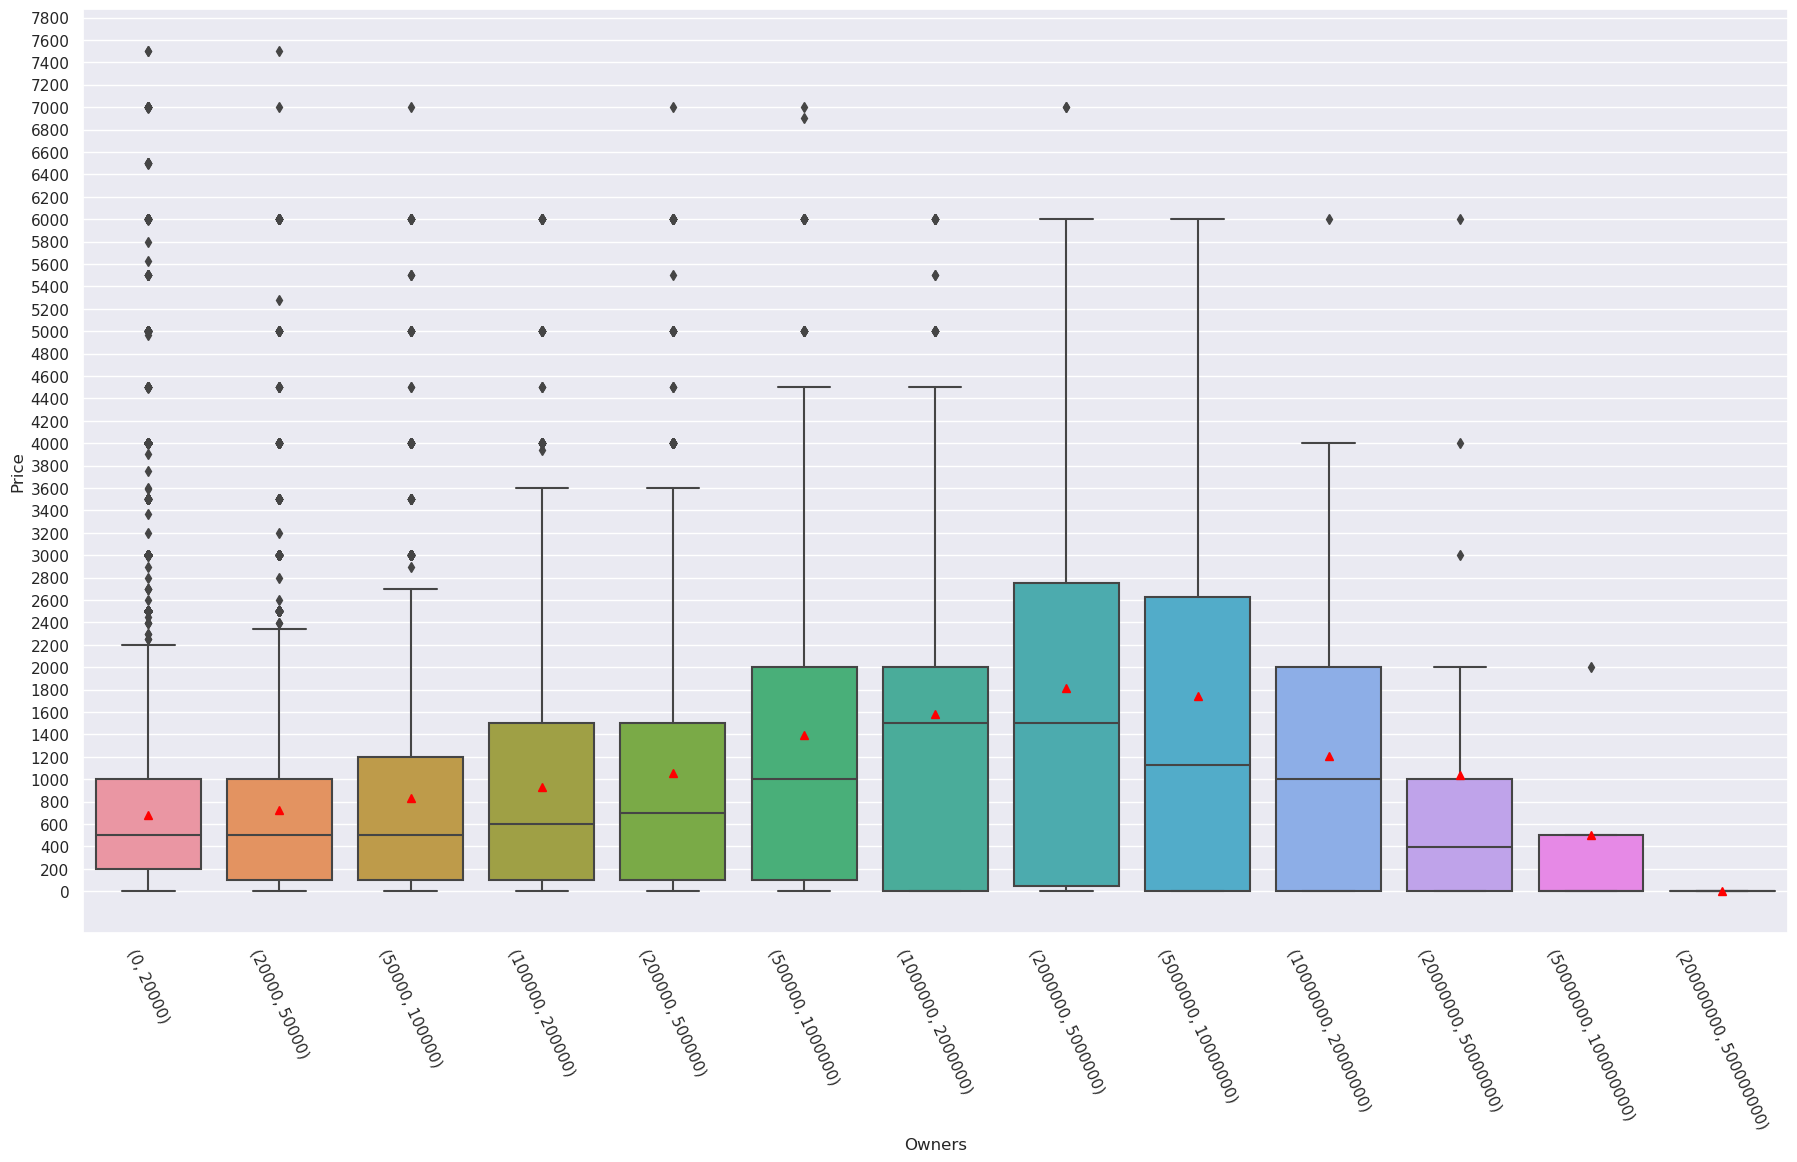

In [65]:
fig=plt.subplots(figsize=(22,12))

y_range=range(0,upper_interval_all,200)

sns.boxplot(x='Owners',y='Price',data=owner_plot,width=0.8,showmeans=True,meanprops={'markerfacecolor':'red',"markeredgecolor":'red'})
plt.yticks(y_range)
plt.setp(plt.gca().get_xticklabels(), rotation=-65, horizontalalignment='center')
plt.show()

<h4>Nhận xét:</h4>

- Trung bình giá mua tăng dần theo theo số lượng người sở hữu. Nhưng đến 1 khoảng nào đó, giá mua game sẽ giảm dần.
- Giá tiền ở những game có số lượng người người sở hữu (2000000, 5000000) có giá mua game rộng nhất (75% số lượng game mua ở giá dưới 2800USD)
- Ở những khoảng người sở hữu game (1000000-2000000), lớn hơn 5000000: thì có 25% số lượng game là miễn phí 0 USD.

<h4>Bước 4: Nhận xét giá tiền có liên quan điến số lượng người sở hữu không</h4>

In [66]:
owner_price_df=steam_df.loc[:,['Owners','Price']].copy()
owner_price_df

,Owners,Price
0,"(10000000, 20000000)",999
1,"(0, 20000)",999
2,"(200000, 500000)",599
3,"(100000, 200000)",1999
4,"(0, 20000)",199
...,...,...
55686,"(0, 20000)",0
55687,"(0, 20000)",299
55688,"(20000, 50000)",0
55689,"(0, 20000)",499


<h5>Thực hiện kiểm định [ANOVA một chiều](https://trithuccongdong.net/tai-lieu-spss/kiem-dinh-anova-trong-spss.html)</h5>

- One-way ANOVA là một loại thử nghiệm thống kê nhằm đánh giá tác động của một biến độc lập duy nhất lên một biến phản hồi duy nhất. Nó giúp xác định xem tất cả các mẫu có giống nhau hay không.

<h5>H0: Không có mối tương quan giữa giá mua game(Price) và số lượng người sở hữu(Owners):</h5>

- P-value>0.05: Chấp nhận giả thuyết H0
- P-value<<0.05: Bác bỏ H0

In [67]:
CategoryGroupLists=owner_price_df.groupby('Owners')['Price'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  1.2147217771073408e-284


<h4>Nhận xét:</h4>

- Ta thấy giá trị P gần như bằng không, do đó, chúng tôi bác bỏ H0. Điều này có nghĩa là các biến có tương quan với nhau.

<h3>Kết luận: Số lượng người sở hữu game có phụ thuộc vào giá tiền của game đó</h3>